In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scp
import seaborn as sns

# k-mers generation

In [3]:
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')

#filter ancanonical seqs
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'), 
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'),
                             keck_raw.cdr3aa.str.endswith('F')))]

In [35]:
from itertools import islice
import tqdm
 
def over_slice(test_str, k=4):
    itr = iter(test_str)
    res = tuple(islice(itr, k))
    if len(res) == k:
        yield res   
    for ele in itr:
        res = res[1:] + (ele,)
        yield res

        
def k_mers_list_generatot(seq, k=4):
    res = ["".join(ele) for ele in over_slice(seq, k)]
    return res

In [5]:
res = keck_raw.cdr3aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=3)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./Sample_k3mers_counts.csv')


# Hashes for palindromes (deprecated)

In [11]:
#asign seqs with cash. It will be equal in polindroms (deprecated)

def palindrome_hash(kmer):
    kmer_hash = hash(kmer) + hash(kmer[::-1]) 
    return kmer_hash

In [12]:
keck_kmers = pd.read_csv('/home/dluppov/Sample_kmers_counts.csv', index_col=0)
keck_kmers

0
CASS  603959
TQYF  171754
EQYF  143523
ASSL  137861
EQFF  132964
...      ...
EMAH       1
HMEF       1
IGHV       1
ELYW       1
CYKL       1

[114003 rows x 1 columns]

In [13]:
hashes = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))#.value_counts()
hashes

0         10308608701847793632
1         11642345971844127960
2          3314839082141439768
3          4525694808602283316
4          2652254469456641272
                  ...         
113998     2964083913677238241
113999    -3839723281295212668
114000      -98845647645669187
114001     2612091170437468639
114002     7063339640627327108
Length: 114003, dtype: object

In [15]:
hashes.index = keck_kmers.index

In [16]:
keck_kmers.insert(1, 'hash', hashes)
keck_kmers

0                  hash
CASS  603959  10308608701847793632
TQYF  171754  11642345971844127960
EQYF  143523   3314839082141439768
ASSL  137861   4525694808602283316
EQFF  132964   2652254469456641272
...      ...                   ...
EMAH       1   2964083913677238241
HMEF       1  -3839723281295212668
IGHV       1    -98845647645669187
ELYW       1   2612091170437468639
CYKL       1   7063339640627327108

[114003 rows x 2 columns]

In [17]:
keck_kmers_summed = keck_kmers.groupby('hash').sum()
keck_kmers_summed

0
hash                      
-18368248475032465510  725
-18340786131244484616    1
-18297237384540770016   18
-18238765403121157298   70
-18238531397791473104    3
...                    ...
18223174336758102792     8
18292873142327868222   359
18297998958454671511     3
18300552758733805436    19
18439894662437165014    64

[65175 rows x 1 columns]

In [4]:
hases_dict = hashes.to_dict()
hases_dict = dict(zip(hases_dict.values(), hases_dict.keys()))

In [19]:
keck_kmers_summed.index = pd.Series(keck_kmers_summed.index).apply(lambda x: hases_dict[x])
keck_kmers_summed

0
hash     
GTTG  725
HPLM    1
ITKS   18
EQVQ   70
QKKQ    3
...   ...
DVVD    8
ENDL  359
LQIM    3
DAAD   19
DTTD   64

[65175 rows x 1 columns]

In [20]:
keck_kmers_summed.to_csv('/home/dluppov/Sample_kmers_counts_mirror_sum.csv')

# 1-mers

In [1]:
#calculate and save the counts of all aa in TCR

keck_raw['cdr3aa'].apply(lambda x: pd.Series(list(x)).value_counts()).sum().to_csv('keck_letter_counts_results.csv')
olga_trb['cdr3aa'].apply(lambda x: pd.Series(list(x)).value_counts()).sum().to_csv('olga_letter_counts_results.csv')

Text(0.5, 1.0, 'KECK freqs')

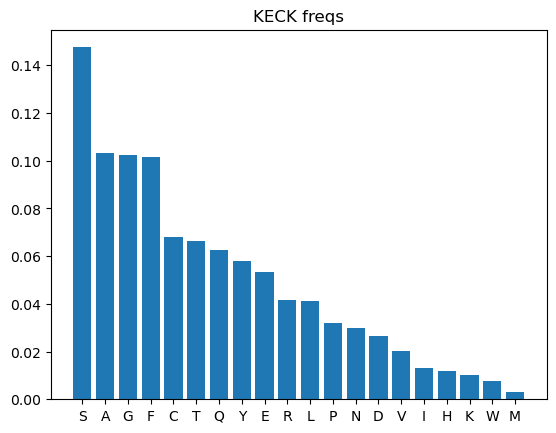

In [4]:
keck_letters = pd.read_csv('/home/dluppov/keck_letter_counts_results.csv', index_col=0)
keck_letters = keck_letters["0"].sort_values(ascending=False)

# keck_letters = keck_letters[0].sort_values()
plt.bar(keck_letters.index, keck_letters/keck_letters.sum())
plt.title('KECK freqs')

Text(0.5, 1.0, 'OLGA freqs')

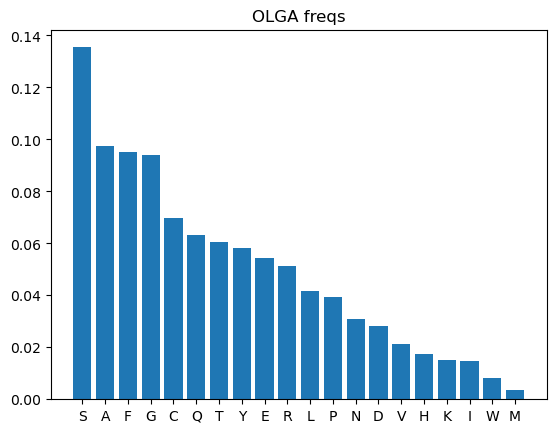

In [7]:
olga_letters = pd.read_csv('/home/dluppov/olga_letter_counts_results.csv', index_col=0)
olga_letters = olga_letters["0"].sort_values(ascending=False)

# keck_letters = keck_letters[0].sort_values()
plt.bar(olga_letters.index, olga_letters/olga_letters.sum())
plt.title('OLGA freqs')

Text(0.5, 1.0, 'KECK vs OLGA freqs')

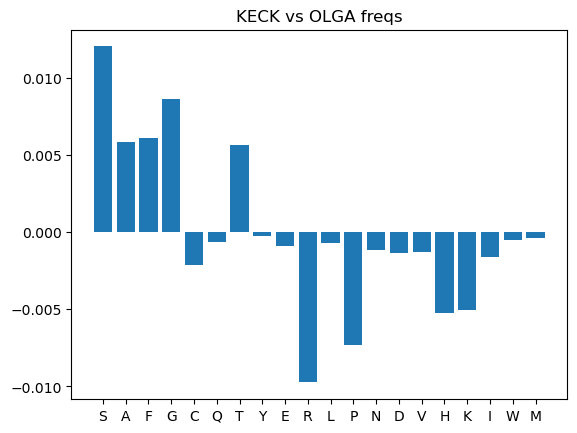

In [9]:
#differences in freqs
keck_letters = keck_letters[olga_letters.index]
plt.bar(keck_letters.index, keck_letters/keck_letters.sum() - olga_letters/olga_letters.sum())
plt.title('KECK vs OLGA freqs')

Text(0.5, 1.0, 'OLGA vs KECK freqs')

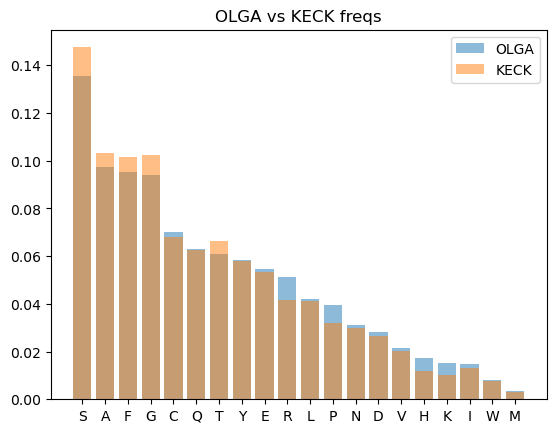

In [10]:
plt.bar(olga_letters.index, olga_letters/olga_letters.sum(), alpha = 0.5, label = 'OLGA')
plt.bar(keck_letters.index, keck_letters/keck_letters.sum(), alpha = 0.5, label = 'KECK')
plt.legend()
plt.title('OLGA vs KECK freqs')

# 1-mers cutted

In [11]:
# to avoid bias cosed by canonical 1 and last letters we will cut them and calculate the freqs of aa usage
res_keck['cdr3aa'].apply(lambda x: x[1:-1]).apply(lambda x: pd.Series(list(x)).value_counts()).sum().to_csv('keck_letter_counts_results_cutted.csv')
res_olga['cdr3aa'].apply(lambda x: x[1:-1]).apply(lambda x: pd.Series(list(x)).value_counts()).sum().to_csv('olga_letter_counts_results_cutted.csv')

Text(0.5, 1.0, 'OLGA vs KECK freqs cutted')

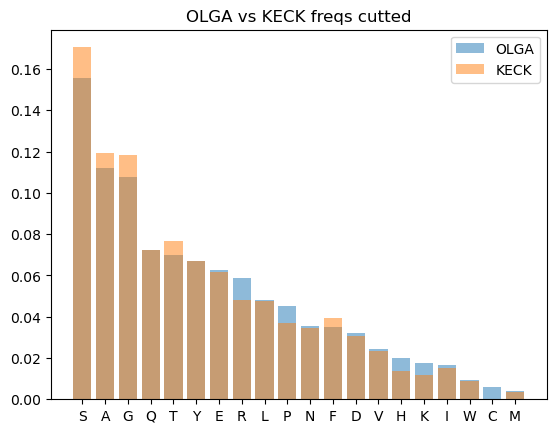

In [13]:
olga_letters = pd.read_csv('/home/dluppov/olga_letter_counts_results_cutted.csv', index_col=0)
olga_letters = olga_letters["0"].sort_values(ascending=False)
keck_letters = pd.read_csv('/home/dluppov/keck_letter_counts_results_cutted.csv', index_col=0)
keck_letters = keck_letters['0'][olga_letters.index]

plt.bar(olga_letters.index, olga_letters/olga_letters.sum(), alpha = 0.5, label = 'OLGA')
plt.bar(keck_letters.index, keck_letters/keck_letters.sum(), alpha = 0.5, label = 'KECK')
plt.legend()
plt.title('OLGA vs KECK freqs cutted')

Text(0.5, 1.0, 'KECK vs OLGA freqs cutted')

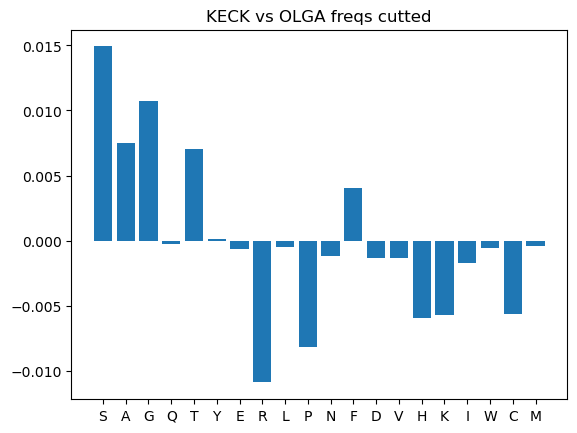

In [14]:
plt.bar(keck_letters.index, keck_letters/keck_letters.sum() - olga_letters/olga_letters.sum())
plt.title('KECK vs OLGA freqs cutted')

# 3mers Freqs plots

In [8]:
keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts.csv', index_col=0)
olga_kmers = pd.read_csv('/home/dluppov/Olga_k3mers_counts.csv', index_col=0)

# keck_kmers = pd.read_csv('./Sample_kmers_counts.csv', index_col=0)
# olga_kmers = pd.read_csv('./Olga_kmers_counts.csv', index_col=0)

In [10]:
# hashes_keck = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_keck.index = keck_kmers.index
# keck_kmers.index.name = 'kmer'
# keck_kmers.insert(0, 'hash', hashes_keck)

# keck_kmers = keck_kmers.reset_index().set_index('hash')

# hashes_olga = pd.Series(olga_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_olga.index = olga_kmers.index
# olga_kmers.index.name = 'kmer'
# olga_kmers.insert(0, 'hash', hashes_olga)
# olga_kmers = olga_kmers.reset_index().set_index('hash')

In [12]:
common_kmers = list(set(keck_kmers.index).intersection(olga_kmers.index))
len(common_kmers)

7852

In [13]:
olga_kmers = olga_kmers.loc[common_kmers]
keck_kmers = keck_kmers.loc[common_kmers]

In [14]:
keck_kmers = keck_kmers['0']
olga_kmers = olga_kmers['0']

In [15]:
keck_kmers = keck_kmers/keck_kmers.sum()
olga_kmers = olga_kmers/olga_kmers.sum()

In [17]:
fold_change_freq = np.log2(keck_kmers/olga_kmers)

In [5]:
#fold_change_freq = fold_change_freq.sort_values(ascending=False)
fold_change_freq.name = 'log2FC'

In [19]:
# hases_dict = hashes_keck.to_dict()
# hases_dict = dict(zip(hases_dict.values(), hases_dict.keys()))
# fold_change_freq.index = pd.Series(fold_change_freq.index).apply(lambda x: hases_dict[x])

In [20]:
keck_kmers.name = 'keck_freq'
olga_kmers.name = 'olga_freq'

#olga_kmers.index = pd.Series(olga_kmers.index).apply(lambda x: hases_dict[x])
#keck_kmers.index = pd.Series(keck_kmers.index).apply(lambda x: hases_dict[x])

keck_kmers = np.log2(keck_kmers[fold_change_freq.index])
olga_kmers = np.log2(olga_kmers[fold_change_freq.index])



summing_df = pd.concat([fold_change_freq, olga_kmers, keck_kmers], axis = 1)
summing_df

log2FC  olga_freq  keck_freq
HYY -0.433367 -16.526882 -16.960249
YVW -0.854867 -18.004855 -18.859722
NHK -2.014943 -18.375294 -20.390237
YRG -0.159172 -11.580811 -11.739983
MAW -0.556912 -18.833325 -19.390237
..        ...        ...        ...
TTM -0.039549 -17.291794 -17.331343
RMR -0.961644 -15.458966 -16.420610
LNK -1.096864 -16.215371 -17.312234
FLS  0.051474 -14.411964 -14.360489
REC -5.604259 -14.785978 -20.390237

[7852 rows x 3 columns]

Text(0, 0.5, 'Sample log2(freq)')

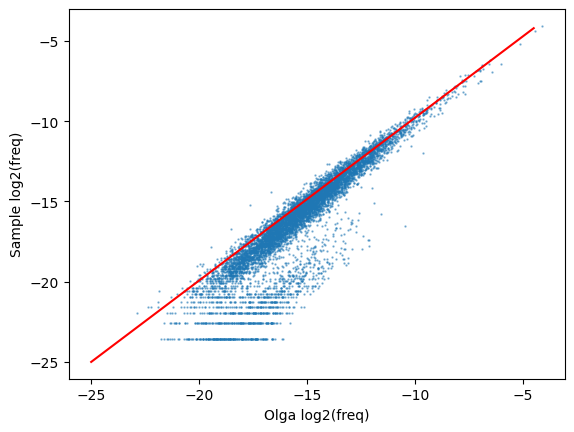

In [21]:
plt.scatter(olga_kmers,
            keck_kmers,
            s = 0.5,
            alpha = 0.5)
plt.plot([-25, -4.5], [-25, -4.2], c = 'r')
plt.xlabel('Olga log2(freq)')
plt.ylabel('Sample log2(freq)')
#plt.plot(np.log2(np.arange(0, 1, 0.01)), np.log2(np.arange(0, 1, 0.01)))

# Freqs plots with statistics

In [6]:
# keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts_mirror_sum.csv', index_col=0)
# olga_kmers = pd.read_csv('/home/dluppov/OLGA_k3mers_counts_mirror_sum.csv', index_col=0)


keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts.csv', index_col=0)
olga_kmers = pd.read_csv('/home/dluppov/Olga_k3mers_counts.csv', index_col=0)

# keck_kmers = pd.read_csv('./Sample_k2mers_counts.csv', index_col=0)
# olga_kmers = pd.read_csv('./Olga_k2mers_counts.csv', index_col=0)

# hashes_keck = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_keck.index = keck_kmers.index
# keck_kmers.index.name = 'kmer'
# keck_kmers.insert(0, 'hash', hashes_keck)

# keck_kmers = keck_kmers.reset_index().set_index('hash')

# hashes_olga = pd.Series(olga_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_olga.index = olga_kmers.index
# olga_kmers.index.name = 'kmer'
# olga_kmers.insert(0, 'hash', hashes_olga)
# olga_kmers = olga_kmers.reset_index().set_index('hash')

common_kmers = list(set(keck_kmers.index).intersection(olga_kmers.index))

olga_kmers = olga_kmers.loc[common_kmers]
keck_kmers = keck_kmers.loc[common_kmers]


keck_kmers = keck_kmers['0']
olga_kmers = olga_kmers['0']

keck_kmers.name = 'keck_freq'
olga_kmers.name = 'olga_freq'

# olga_kmers.index = pd.Series(olga_kmers.index).apply(lambda x: hases_dict[x])
# keck_kmers.index = pd.Series(keck_kmers.index).apply(lambda x: hases_dict[x])

n = keck_kmers.sum()
m = olga_kmers.sum()
ps = olga_kmers/olga_kmers.sum()
mus = ps*n


In [7]:
#chi squere test for k-mer freqs in KECK vs OLGA
res_dict = {}
for ind in keck_kmers.index:
    res_dict[ind] = scp.chi2_contingency([[keck_kmers[ind], n - keck_kmers[ind]],
                                         [olga_kmers[ind], m - olga_kmers[ind]]])[1]

In [8]:
p_vals = pd.Series(res_dict)
p_vals

SPH     7.970274e-01
KKF     4.291385e-05
ARD    3.151527e-276
KIG     2.925782e-04
EII     2.563858e-05
           ...      
YGM     2.234259e-01
DTP     1.127287e-09
DQS     6.534824e-03
ATT     5.001376e-09
PDF     4.000826e-02
Length: 7852, dtype: float64

In [9]:
p_vals = p_vals.apply(lambda x: 10**(-100) if x < 10**(-100) else x)

In [10]:
log_pvals = np.log10(p_vals)
log_pvals

SPH     -0.098527
KKF     -4.367403
ARD   -100.000000
KIG     -3.533758
EII     -4.591106
          ...    
YGM     -0.650866
DTP     -8.947966
DQS     -2.184766
ATT     -8.300910
PDF     -1.397850
Length: 7852, dtype: float64

In [11]:
keck_kmers = keck_kmers/keck_kmers.sum()
olga_kmers = olga_kmers/olga_kmers.sum()

fold_change_freq = np.log2(keck_kmers/olga_kmers)
fold_change_freq.name = 'log2FC'

keck_kmers = np.log2(keck_kmers[fold_change_freq.index])
olga_kmers = np.log2(olga_kmers[fold_change_freq.index])


summing_df = pd.concat([fold_change_freq, olga_kmers, keck_kmers], axis = 1)
summing_df

log2FC  olga_freq  keck_freq
SPH  0.010320 -12.958535 -12.948215
KKF -1.292850 -17.874994 -19.167844
ARD  0.434173 -10.067946  -9.633773
KIG -0.297811 -14.874334 -15.172144
EII -0.838957 -16.939845 -17.778802
..        ...        ...        ...
YGM  0.242605 -17.780399 -17.537794
DTP -0.428848 -14.320743 -14.749590
DQS -0.242046 -15.143190 -15.385236
ATT -0.169732 -12.001336 -12.171068
PDF -0.235288 -15.857268 -16.092556

[7852 rows x 3 columns]

In [12]:
summing_df_all = pd.concat([summing_df, log_pvals], axis = 1)
summing_df_all.rename(columns = {0: 'log10_p_val'}, inplace = True)
summing_df_all

log2FC  olga_freq  keck_freq  log10_p_val
SPH  0.010320 -12.958535 -12.948215    -0.098527
KKF -1.292850 -17.874994 -19.167844    -4.367403
ARD  0.434173 -10.067946  -9.633773  -100.000000
KIG -0.297811 -14.874334 -15.172144    -3.533758
EII -0.838957 -16.939845 -17.778802    -4.591106
..        ...        ...        ...          ...
YGM  0.242605 -17.780399 -17.537794    -0.650866
DTP -0.428848 -14.320743 -14.749590    -8.947966
DQS -0.242046 -15.143190 -15.385236    -2.184766
ATT -0.169732 -12.001336 -12.171068    -8.300910
PDF -0.235288 -15.857268 -16.092556    -1.397850

[7852 rows x 4 columns]

In [13]:
#marker if C in kmer

c_marker = pd.Series(summing_df_all.index).apply(lambda x: True if 'C' in x else False)
c_marker.index = summing_df_all.index
summing_df_all.insert(4, 'c_marker', c_marker)

In [14]:
summing_df_all.to_csv('3mer_tes_data.csv')

In [15]:
import plotly.express as px

fig = px.scatter(summing_df_all, x="olga_freq", y="keck_freq",
                 color="log10_p_val",
                 #color_discrete_sequence=px.colors.qualitative.Antique
                )
fig.update_traces(marker=dict(size=4, opacity = 0.4))

fig.add_scatter(x = [-22, -4.5], y = [-22, -4.2], mode = 'lines')
fig.update_layout(showlegend=False)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=100,
        r=100,
       b=60,
        t=60,
        pad=0
    ),
)

fig.show()

In [19]:
#fig.write_html('/home/dluppov/repo/tcr-thymic-selection/naive_cells/html_plots/olga_keck_freqs.html')

In [32]:
summing_df_all_cluster = summing_df_all[summing_df_all.olga_freq - summing_df_all.keck_freq > 2.5]

In [20]:
#glycomarker

glyco_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] == 'N' and (x[2] == 'T' or x[2] == 'S') else False)
glyco_marker.index = summing_df_all.index
summing_df_all.insert(5, 'glyco_marker', glyco_marker)

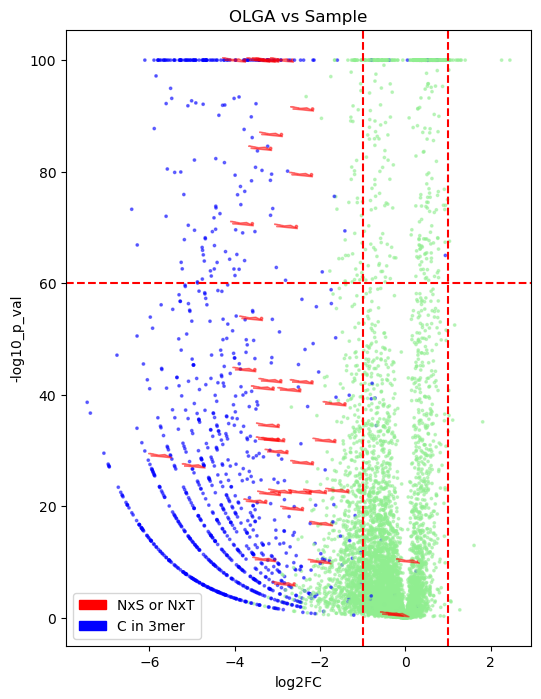

In [21]:
#volcanoplot to show fc and p of glycosylation sites

import matplotlib.patches as mpatches

plt.figure(figsize=(6, 8))
#colors = summing_df_all.glyco_marker.apply(lambda x: 'r' if x else 'b')

colors = np.where(summing_df_all.c_marker, 'b', np.where(summing_df_all.glyco_marker, 'r', 'lightgreen'))

plt.scatter(summing_df_all.log2FC, -summing_df_all.log10_p_val, s = 3, c=colors, alpha=0.5)
plt.xlabel('log2FC')
plt.ylabel('-log10_p_val')
plt.axvline(-1, color= 'r', linestyle = '--')
plt.axvline(1, color = 'r', linestyle = '--')
plt.axhline(60, color = 'r', linestyle = '--')

red_patch = mpatches.Patch(color='r', label='NxS or NxT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')

plt.legend(handles=[red_patch, blue_patch])

plt.title('OLGA vs Sample')

for i in range(len(summing_df_all)):
#     if summing_df_all.iloc[i]['c_marker']:
#         plt.arrow(summing_df_all.iloc[i]['log2FC'], -summing_df_all.iloc[i]['log10_p_val'], 0, 0.5, color='b', width=0.02, head_width=0.1, alpha=0.5)
     if summing_df_all.iloc[i]['glyco_marker']:
        plt.arrow(-0.5+summing_df_all.iloc[i]['log2FC'], 0.415-summing_df_all.iloc[i]['log10_p_val'], 0.2, -0.3, color='r', width=0.05, head_width=0.4, alpha=0.5)

In [37]:
# glutamyl carboxylation site 
er_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] in {'E', 'R'} and x[1] == 'E' and x[2] in {'E', 'R'} else False)
er_marker.index = summing_df_all.index

summing_df_all.insert(5, 'er_marker', er_marker)

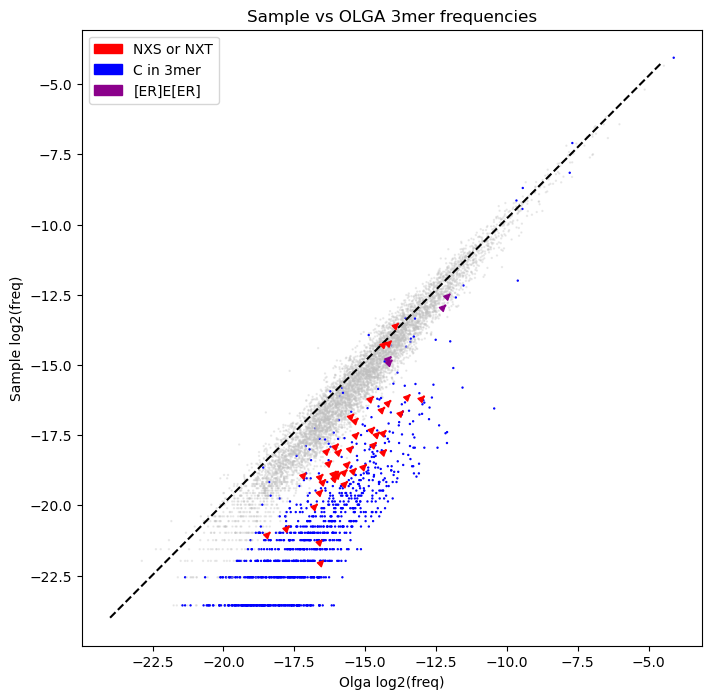

In [38]:
#freq plots with special kmers marked

colors = np.where(summing_df_all.c_marker, 'b',
                  np.where(summing_df_all.glyco_marker, 'r',
                           np.where(summing_df_all.er_marker, 'darkmagenta', 'silver')))
alpha = np.where(summing_df_all.c_marker, 1,
                  np.where(summing_df_all.glyco_marker, 1,
                           np.where(summing_df_all.er_marker, 1, 0.3)))


plt.figure(figsize=(8, 8))
plt.scatter(olga_kmers,
            keck_kmers,
            s = 0.5,
            alpha = alpha, c = colors)
plt.plot([-24, -4.5], [-24, -4.2], '--', c = 'black')
plt.xlabel('Olga log2(freq)')
plt.ylabel('Sample log2(freq)')

for i, row in summing_df_all[summing_df_all.glyco_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='red', headwidth=4, headlength=4, edgecolor='red'))
    
for i, row in summing_df_all[summing_df_all.er_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='darkmagenta', headwidth=4, headlength=4, edgecolor='darkmagenta'))
    
plt.title('Sample vs OLGA 3mer frequencies')

red_patch = mpatches.Patch(color='r', label='NXS or NXT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')
magenta_patch = mpatches.Patch(color='darkmagenta', label='[ER]E[ER]')

plt.legend(handles=[red_patch, blue_patch, magenta_patch])

# Physical chemistry

In [49]:
import peptides

In [51]:
#charge calcualtion for OLGA
olga_trb_charge = olga_trb.aa.apply(lambda x: peptides.Peptide(x).charge())

In [52]:
pd.concat([olga_trb, olga_trb_charge], axis = 1).to_csv('/home/dluppov/olga_trb_charge.csv')

In [ ]:
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               

In [31]:
keck_raw_charge = keck_raw.cdr3aa.apply(lambda x: peptides.Peptide(x).charge())
keck_raw_charge

3        -1.062215
4         0.935307
5         0.026919
6        -0.972635
7        -1.063916
            ...   
968558    0.935786
968559   -0.065540
968560   -1.066095
968561   -0.063919
968562   -0.064770
Name: cdr3aa, Length: 964889, dtype: float64

In [33]:
keck_raw_charge.name = 'charge'

In [35]:
pd.concat([keck_raw, keck_raw_charge], axis = 1).to_csv('/home/dluppov/keck_charge.csv')

In [64]:
keck_charge = pd.read_csv('/home/dluppov/keck_charge.csv')
olga_charge = pd.read_csv('/home/dluppov/olga_trb_charge.csv')

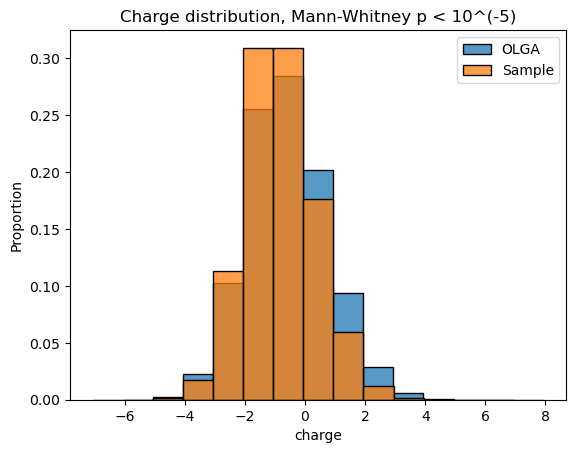

In [67]:
sns.histplot(olga_charge.charge, binwidth= 1 , stat = 'proportion', label = 'OLGA')
sns.histplot(keck_charge.charge, binwidth = 1, stat = "proportion", label = 'Sample')
plt.title('Charge distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

In [51]:
charge_res =scp.mannwhitneyu(olga_charge.charge, keck_charge.charge)
charge_res

MannwhitneyuResult(statistic=4430574966084.5, pvalue=0.0)

In [60]:
keck_hydrophobicity = keck_charge.cdr3aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
keck_hydrophobicity

0         0.321429
1        -0.430769
2         0.916667
3        -0.130769
4         0.118182
            ...   
964884   -0.616667
964885   -0.966667
964886   -0.376923
964887   -1.183333
964888   -0.454545
Name: cdr3aa, Length: 964889, dtype: float64

In [61]:
pd.concat([keck_charge, keck_hydrophobicity], axis = 1).to_csv('/home/dluppov/keck_charge_hydrophobicity.csv')

In [69]:
olga_trb_hydrophobicity = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv',index_col=0)
keck_hydrophobicity = pd.read_csv('/home/dluppov/keck_charge_hydrophobicity.csv', index_col=0)
#olga_trb_hydrophobicity.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1).to_csv('olga_trb_charge_hydrophobicity.csv')

In [71]:
olga_trb_hydrophobicity.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_hydrophobicity.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

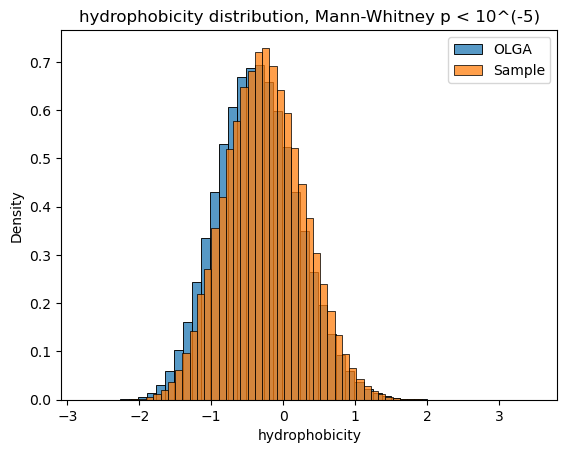

In [72]:
sns.histplot(olga_trb_hydrophobicity.hydrophobicity, bins = 50, stat = 'density', label = 'OLGA')
sns.histplot(keck_hydrophobicity.hydrophobicity, bins = 50, stat = "density", label = 'Sample')
plt.title('hydrophobicity distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

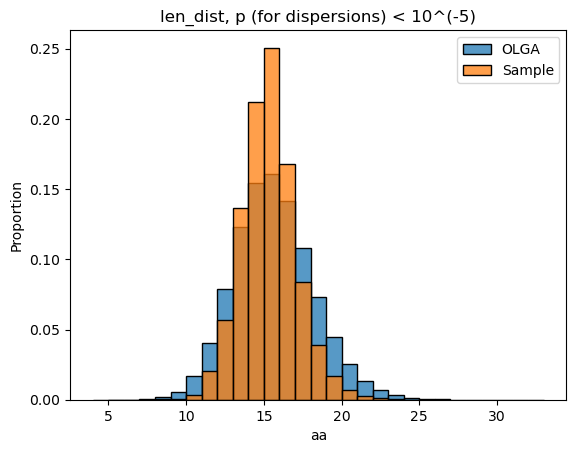

In [43]:
sns.histplot(olga_trb_hydrophobicity.aa.apply(len), binwidth = 1, stat = 'proportion', label = 'OLGA')
sns.histplot(keck_hydrophobicity.cdr3aa.apply(len), binwidth = 1, stat = 'proportion', label = 'Sample')
plt.title('length distribution, p (for dispersions) < 10^(-5)')
plt.legend()
plt.show()

In [41]:
olga_lens = olga_trb_hydrophobicity.aa.apply(len)
keck_kens = keck_hydrophobicity.cdr3aa.apply(len)

In [42]:
res_lens= scp.kruskal(olga_lens, keck_kens)
res_lens

KruskalResult(statistic=10762.210284472058, pvalue=0.0)

In [43]:
olga_lens.std()/keck_kens.std()

1.4376460476808546

In [44]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) 
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-scp.f.cdf(f, dfn, dfd)
    return f, p

In [45]:
f_test(olga_lens, keck_kens)

(2.066826158397984, 1.1102230246251565e-16)